# Part 1. Rank hydrophobicity scores of MaSIF test set.
## Used the hydrophobicity script on the cluster, rank the output to break down in groups for comparison step
Important! This generates the data to perform 'MaSIF comparison' on!

In [45]:
# Import packages
import os
import argparse
import time
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Import the dict and convert it to a df
data_path = '../data/masif_testing/'
F = open(str(data_path + 'interface_output_original_testing.txt'), "r")
X = F.readlines()

In [47]:
#Functions to read .txt and convert to a list of dicts
new_line_clipper = lambda x: x.replace("\n", "")
nan_replacer = lambda x: x.replace("nan", '"No result"' )
input_to_dict = lambda x: ast.literal_eval(x)

In [48]:
# Map function above to strings in list to convert to list of dicts
results = list(map(new_line_clipper, X))
results = list(map(nan_replacer, results))
results = list(map(input_to_dict, results))

In [49]:
# Convert to dataframe
results_df = pd.DataFrame(results, columns = ['Protein_pdb', 'Total_mean_hydrophobicity', 'Former_chains_hydrophobicity'])
results_df = results_df.applymap(lambda x: x[0])

In [50]:
# Now go back to nan, a bit annoying
results_df = results_df.replace('No result', np.nan)

In [51]:
# Convert to float to allow calculation and ranking
pd.to_numeric(results_df['Total_mean_hydrophobicity'], downcast = 'float')
pd.to_numeric(results_df['Former_chains_hydrophobicity'], downcast = 'float')
# Make column names better for plots, put 'nan' fields back
results_df.rename(columns = {"Total_mean_hydrophobicity": "Total hydrophobicity"}, inplace=True)
results_df.rename(columns = {"Former_chains_hydrophobicity": "Former hydrophobicity"}, inplace=True)

In [52]:
# For our purposes, remove nans
results_df = results_df.dropna()

In [53]:
# Also, do an inner merge to ensure that you only keep
# proteins for later steps that also worked in the precompute masif part when getting descriptors
succ_prot = open(str(data_path + 'precomputation_proteins.txt'), "r")
Y = succ_prot.readlines()
succ_prot_list = list(map(new_line_clipper, Y))
succ_prot_df = pd.DataFrame(succ_prot_list, columns = ['Protein_pdb'])

In [54]:
results_df = pd.merge(results_df, succ_prot_df, how = 'inner')

In [55]:
results_df.sort_values(by = 'Total hydrophobicity', inplace=True)

In [61]:
results_df

,Protein_pdb,Total hydrophobicity,Former hydrophobicity
149,2HVB_A_B,-55.000000,-55.000000
358,2I32_A_E,-46.000000,-46.000000
366,3U4J_C_B,-33.916667,-33.333333
161,1O9A_A_B,-32.333333,-32.333333
307,2K6D_A_B,-31.000000,-31.000000
...,...,...,...
201,2JI1_C_D,86.375000,99.000000
611,3KTS_A_B,90.333333,90.333333
401,4KGG_C_A,97.000000,97.000000
32,1NPO_A_C,97.000000,97.000000


/Users/maxjansen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


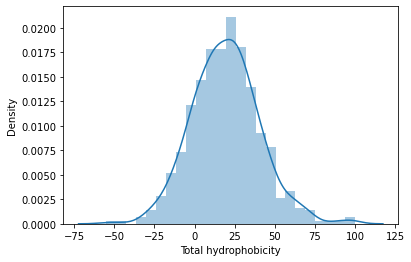

In [62]:
plt.clf()
ax = sns.distplot(results_df['Total hydrophobicity'])
plt.savefig('Total_hydro_dist.png')

In [56]:
# Select least hydrophobic and write to file
results_least = results_df[0:100]

In [64]:
results_middle

,Protein_pdb,Total hydrophobicity,Former hydrophobicity
29,1JKG_A_B,14.947917,21.3125
269,3DCL_A_B,14.950000,18.5000
464,3TSR_A_E,14.958333,-14.2500
270,3EYD_C_D,15.000000,1.2500
320,3UI2_A_B,15.000000,76.0000
...,...,...,...
537,3TDM_A_B,22.700000,26.8000
259,3D5N_F_I,22.750000,23.7500
45,1I9C_C_D,22.785714,10.0000
586,2Z0P_C_D,22.812500,9.7500


In [57]:
results_most = results_df[-100:]

In [58]:
results_middle = results_df.iloc[int((len(results_df)/2)-50):int((len(results_df)/2)+50)]

In [59]:
def sub_writer(file_name, sub_df):
    with open(file_name, 'w') as f:
        for entry in sub_df['Protein_pdb']:
            f.write(entry + '\n')

In [60]:
sub_writer(str(data_path + 'least_hydrophobic.txt'), results_least)
sub_writer(str(data_path + 'middle_hydrophobic.txt'), results_middle)
sub_writer(str(data_path + 'most_hydrophobic.txt'), results_most)